## RF
Pertumbuhan sektor jasa ini telah berkembang ke berbagai bidang usaha, salah satunya adalah usaha rumah kost. Banyak faktor yang menjadi pertimbangan dalam memilih rumah kost misalnya lokasi yang strategis seperti dekat dengan kampus, tempat makan, warnet, fotocopy, shopping center, ataupun tempat-tempat hiburan lainnya. Oleh karena itu, untuk membangun kos kosan harus ditentukan apakah di suatu area itu cocok untuk dibangun kos putra, putri, atau campur berdasarkan faktor-faktor tersebut. Untuk mengetahui di suatu area itu cocok untuk dibangun kos putra, putri atau campur dilakukan pemodelan menggunakan algoritma random forest.

### Dataset
Data yang digunakan pada analisis ini adalah data karakteristik kost - kost an yang terdiri dari 17
Variable yaitu sebagai berikut :
1. Id : id kost
2. fac_1 - fac_8 : fasilitas kost
3. poi_1 : jarak ke POI 1
4. poi_2 : jarak ke POI 2
5. poi_3 : jarak ke POI 3
6. size : luas kamar
7. room_count : jumlah kamar
8. total_call : jumlah pencarian ke kost tersebut
9. gender : jenis gender yang ditampung oleh kost tersebut

### Metode
Metode yang digunakan adalah Random Forest. Random Forest merupakan sebuah metode ensemble yang terdiri dari beberapa pohon keputusan sebagai classifier. Kelas yang dihasilkan dari proses klasifikasi ini diambil dari kelas terbanyak yang dihasilkan oleh pohon-pohon keputusan yang ada sehingga membuat akurasi dari Random Forest meningkat (Rahmi dkk., 2007). Algoritma Random Forest dapat digunakan untuk menyelesaikan persoalan klasifikasi dan juga regresi selain itu, Random Forest dapat digunakan untuk berbagai jenis variabel respon seperti kontinu, diskrit, data survival maupun data kombinasi multivariat. Selain itu tidak ada asumsi yang harus dipenuhi pada Random Forest.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
1,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
2,3,1.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
3,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
4,5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


In [5]:
dataset['fac_1']= dataset['fac_1'].astype('category')
dataset['fac_2']= dataset['fac_2'].astype('category')
dataset['fac_3']= dataset['fac_3'].astype('category')
dataset['fac_4']= dataset['fac_4'].astype('category')
dataset['fac_5']= dataset['fac_5'].astype('category')
dataset['fac_6']= dataset['fac_6'].astype('category')
dataset['fac_7']= dataset['fac_7'].astype('category')
dataset['fac_8']= dataset['fac_8'].astype('category')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             3293 non-null   int64   
 1   fac_1          3230 non-null   category
 2   fac_2          3219 non-null   category
 3   fac_3          3231 non-null   category
 4   fac_4          3222 non-null   category
 5   fac_5          3221 non-null   category
 6   fac_6          3229 non-null   category
 7   fac_7          3215 non-null   category
 8   fac_8          3225 non-null   category
 9   poi_1          3226 non-null   float64 
 10  poi_2          3226 non-null   float64 
 11  poi_3          3207 non-null   float64 
 12  size           3225 non-null   float64 
 13  price_monthly  3208 non-null   float64 
 14  room_count     3223 non-null   float64 
 15  total_call     3293 non-null   int64   
 16  gender         3293 non-null   object  
dtypes: category(8), float64(6), int64

In [8]:
dataset.describe()

,id,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call
count,3293.000000,3226.000000,3226.000000,3207.000000,3225.000000,3.208000e+03,3223.000000,3293.000000
mean,1647.000000,4679.478921,9920.515189,4906.215778,12.143745,8.975029e+05,10.506050,35.362587
std,950.751545,3569.137245,4714.800696,3617.408043,4.951679,6.501208e+05,9.565184,47.269615
min,1.000000,519.000000,168.000000,324.000000,6.000000,1.550000e+05,1.000000,1.000000
25%,824.000000,2355.500000,7875.750000,2693.000000,9.000000,5.000000e+05,4.000000,8.000000
50%,1647.000000,3961.000000,9241.000000,3927.000000,12.000000,6.500000e+05,8.000000,20.000000
75%,2470.000000,5900.750000,12422.750000,6099.000000,12.250000,1.200000e+06,14.000000,44.000000
max,3293.000000,48675.000000,55105.000000,46517.000000,48.000000,5.000000e+06,121.000000,769.000000


In [13]:
dataset['gender'].value_counts()

putri     1729
putra      954
campur     610
Name: gender, dtype: int64

In [14]:
#cek missing value
dataset.info(memory_usage=False)
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             3293 non-null   int64   
 1   fac_1          3230 non-null   category
 2   fac_2          3219 non-null   category
 3   fac_3          3231 non-null   category
 4   fac_4          3222 non-null   category
 5   fac_5          3221 non-null   category
 6   fac_6          3229 non-null   category
 7   fac_7          3215 non-null   category
 8   fac_8          3225 non-null   category
 9   poi_1          3226 non-null   float64 
 10  poi_2          3226 non-null   float64 
 11  poi_3          3207 non-null   float64 
 12  size           3225 non-null   float64 
 13  price_monthly  3208 non-null   float64 
 14  room_count     3223 non-null   float64 
 15  total_call     3293 non-null   int64   
 16  gender         3293 non-null   object  
dtypes: category(8), float64(6), int64

atribut yang memiliki missing value adalah fac1-8. poi1-3. price_montly, room_count.

In [15]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
print(display_missing(dataset))

id column missing values: 0
fac_1 column missing values: 63
fac_2 column missing values: 74
fac_3 column missing values: 62
fac_4 column missing values: 71
fac_5 column missing values: 72
fac_6 column missing values: 64
fac_7 column missing values: 78
fac_8 column missing values: 68
poi_1 column missing values: 67
poi_2 column missing values: 67
poi_3 column missing values: 86
size column missing values: 68
price_monthly column missing values: 85
room_count column missing values: 70
total_call column missing values: 0
gender column missing values: 0


None


In [19]:
#handling missing value
dataset['fac_1'].fillna(dataset['fac_1'].mode()[0], inplace=True)
dataset['fac_2'].fillna(dataset['fac_1'].mode()[0], inplace=True)
dataset['fac_3'].fillna(dataset['fac_1'].mode()[0], inplace=True)
dataset['fac_4'].fillna(dataset['fac_1'].mode()[0], inplace=True)
dataset['fac_5'].fillna(dataset['fac_1'].mode()[0], inplace=True)
dataset['fac_6'].fillna(dataset['fac_1'].mode()[0], inplace=True)
dataset['fac_7'].fillna(dataset['fac_1'].mode()[0], inplace=True)
dataset['fac_8'].fillna(dataset['fac_1'].mode()[0], inplace=True)

In [20]:
dataset['poi_1'].fillna(dataset['poi_1'].median(), inplace=True)
dataset['poi_2'].fillna(dataset['poi_2'].median(), inplace=True)
dataset['poi_3'].fillna(dataset['poi_3'].median(), inplace=True)
dataset['size'].fillna(dataset['size'].median(), inplace=True)
dataset['price_monthly'].fillna(dataset['price_monthly'].median(), inplace=True)
dataset['room_count'].fillna(dataset['room_count'].median(), inplace=True)

In [21]:
print(display_missing(dataset))

id column missing values: 0
fac_1 column missing values: 0
fac_2 column missing values: 0
fac_3 column missing values: 0
fac_4 column missing values: 0
fac_5 column missing values: 0
fac_6 column missing values: 0
fac_7 column missing values: 0
fac_8 column missing values: 0
poi_1 column missing values: 0
poi_2 column missing values: 0
poi_3 column missing values: 0
size column missing values: 0
price_monthly column missing values: 0
room_count column missing values: 0
total_call column missing values: 0
gender column missing values: 0


None


In [22]:
dataset['room_count'] = dataset['room_count'].astype(np.int64)

In [23]:
data_test = pd.read_csv('test_data.csv')

In [24]:
data_test['fac_1']= data_test['fac_1'].astype('category')
data_test['fac_2']= data_test['fac_2'].astype('category')
data_test['fac_3']= data_test['fac_3'].astype('category')
data_test['fac_4']= data_test['fac_4'].astype('category')
data_test['fac_5']= data_test['fac_5'].astype('category')
data_test['fac_6']= data_test['fac_6'].astype('category')
data_test['fac_7']= data_test['fac_7'].astype('category')
data_test['fac_8']= data_test['fac_8'].astype('category')
data_test['room_count'] = data_test['room_count'].astype(np.int64)

In [25]:
x_test = data_test[data_test.columns.drop('id')]
print(display_missing(data_test))

id column missing values: 0
fac_1 column missing values: 0
fac_2 column missing values: 0
fac_3 column missing values: 0
fac_4 column missing values: 0
fac_5 column missing values: 0
fac_6 column missing values: 0
fac_7 column missing values: 0
fac_8 column missing values: 0
poi_1 column missing values: 0
poi_2 column missing values: 0
poi_3 column missing values: 0
size column missing values: 0
price_monthly column missing values: 0
room_count column missing values: 0
total_call column missing values: 0


None


In [26]:
x_train = dataset[dataset.columns.drop('gender')]
x_train = x_train[x_train.columns.drop('id')]
y_train = dataset['gender']

In [27]:
x_train

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.0000,1500000.0,6,72
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4548.0,9332.0,6867.0,12.0000,1500000.0,30,56
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.0000,1600000.0,20,109
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.2500,1500000.0,15,54
4,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.8500,2100000.0,10,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,10.5000,1600000.0,11,21
3289,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,18.9600,2200000.0,2,1
3290,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,21.2000,2500000.0,1,18
3291,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1669.0,10065.0,3994.0,10.5625,400000.0,21,181


In [28]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
clf = RandomForestClassifier(max_depth = 4, n_estimators=250, n_jobs=-1)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [29]:
y_pred = clf.predict(x_test)

In [39]:
x_test['gender'] = y_pred

In [30]:
feature_imp = pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print("\nFeature importance:")
print(feature_imp.head())


Feature importance:
price_monthly    0.308778
size             0.089694
fac_4            0.081327
total_call       0.079231
poi_3            0.063517
dtype: float64


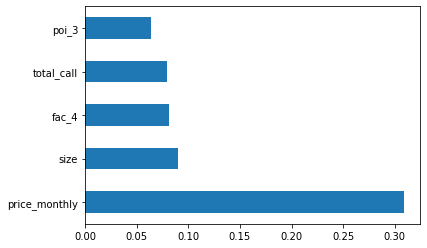

In [31]:
feature_imp.nlargest(5).plot(kind='barh')

Hasil diatas menunjukan bahwa jenis kosan sangat bergantung dengan harga bulanan kosan, ukuran kosan, faktor 4 ( fasilitas ke 4), jarak ke poi ke 3 dan banyak pencarian.

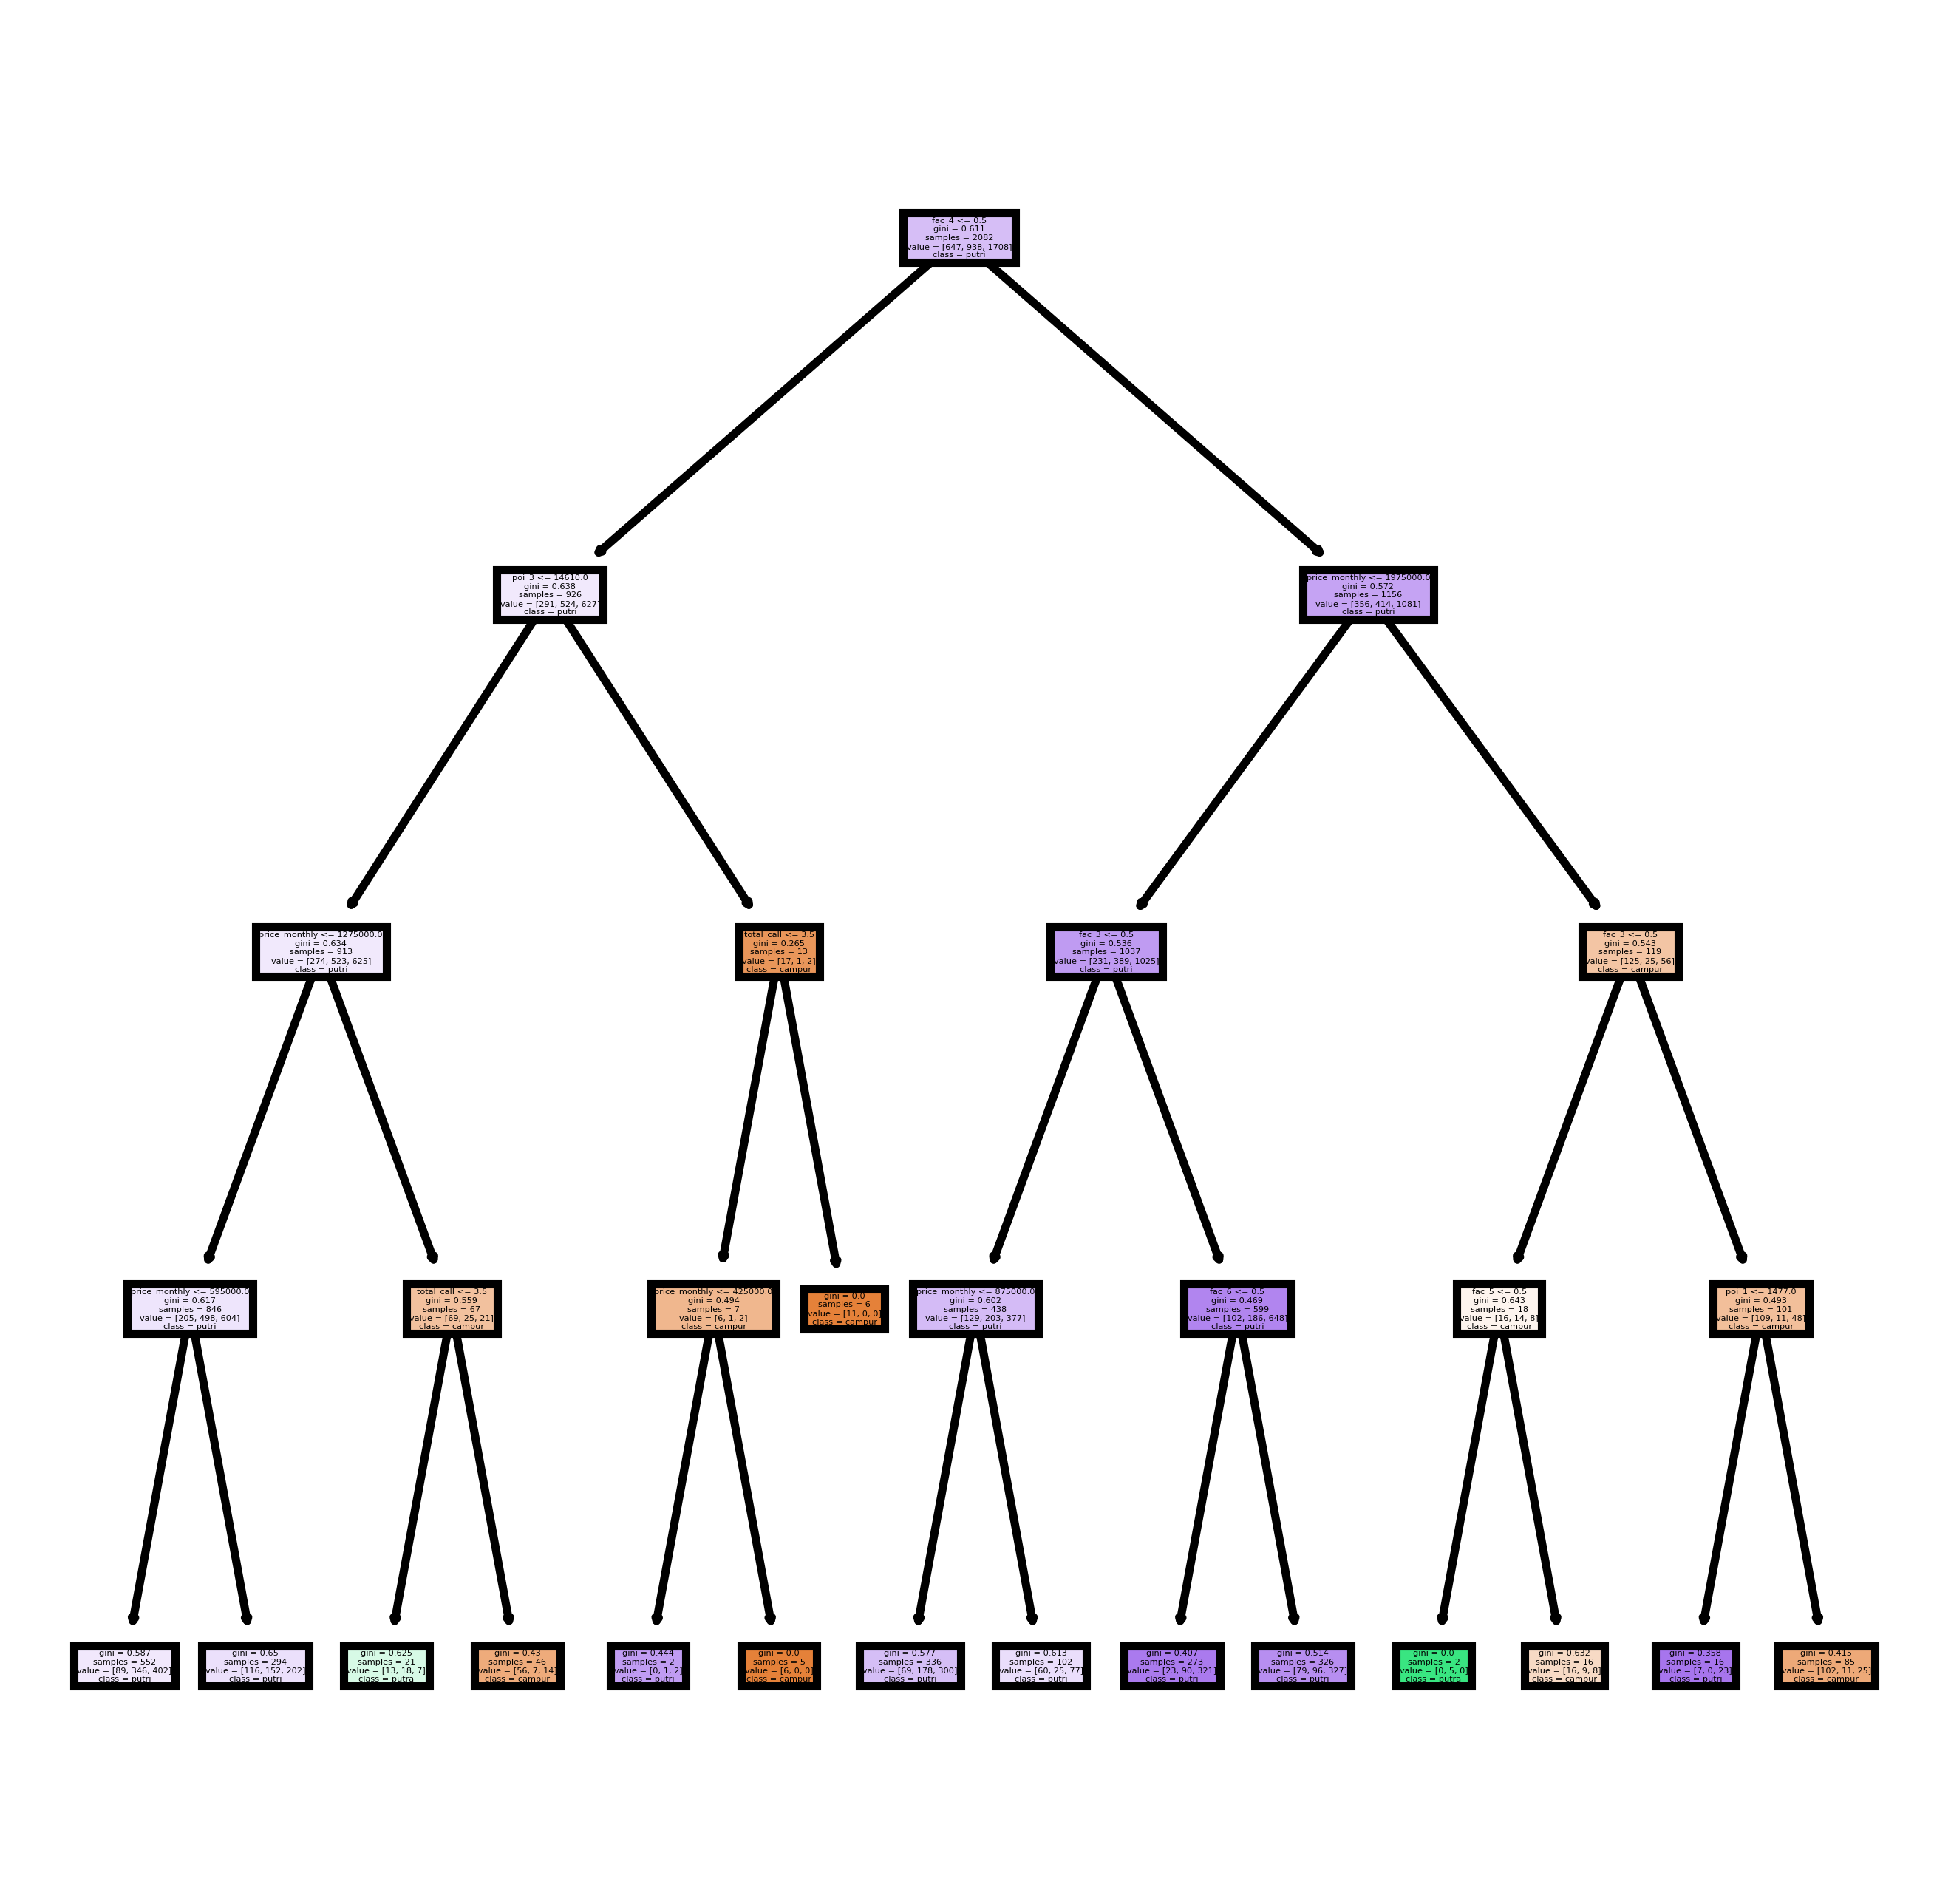

In [36]:
from sklearn import tree
estimator = clf.estimators_[5]
fn=x_train.columns
cn=['campur','putra','putri']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('hasil_rf.png')

### Contoh penjelasan Rules dari Tree yang dihasilkan
- tidak terdapat fasilitas 4 (fac_4)
- jarak ke poi 3 >= 14610
- total pencarian < 4
- harga bulanan < 425 000
<br>
maka jenis kosannya adalah untuk Putri
- tidak terdapat fasilitas 4 (fac_4)
- jarak ke poi 3 <= 14610
- harga bulanan >= 1.275.000
- total pencarian < 4
<br>
maka jenis kosannya adalah utuk putra
- tidak terdapat fasilitas 4 (fac_4)
- jarak ke poi 3 <= 14610
- harga bulanan >= 1.275.000
- total pencarian > 4 atau
- harga bulanan >= 425000
<br>
maka jenis kosannya adalah untuk campuran

In [102]:
from sklearn.model_selection import train_test_split
data_training, data_testing, target_train, target_test = train_test_split(x_train, y_train, test_size=0.70, random_state=14045)

In [103]:
model = RandomForestClassifier(max_depth = 4, n_estimators=250, n_jobs=-1)

In [104]:
model.fit(data_training, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [105]:
hasil_pred = model.predict(data_testing)

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, hasil_pred)

In [107]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

NameError: name 'sns' is not defined

In [108]:
print("\nAkurasi:",metrics.accuracy_score(target_test, hasil_pred)*100,"%")


Akurasi: 54.98699045967042 %


In [109]:
estimator = model.estimators_[5]
estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1226938211, splitter='best')

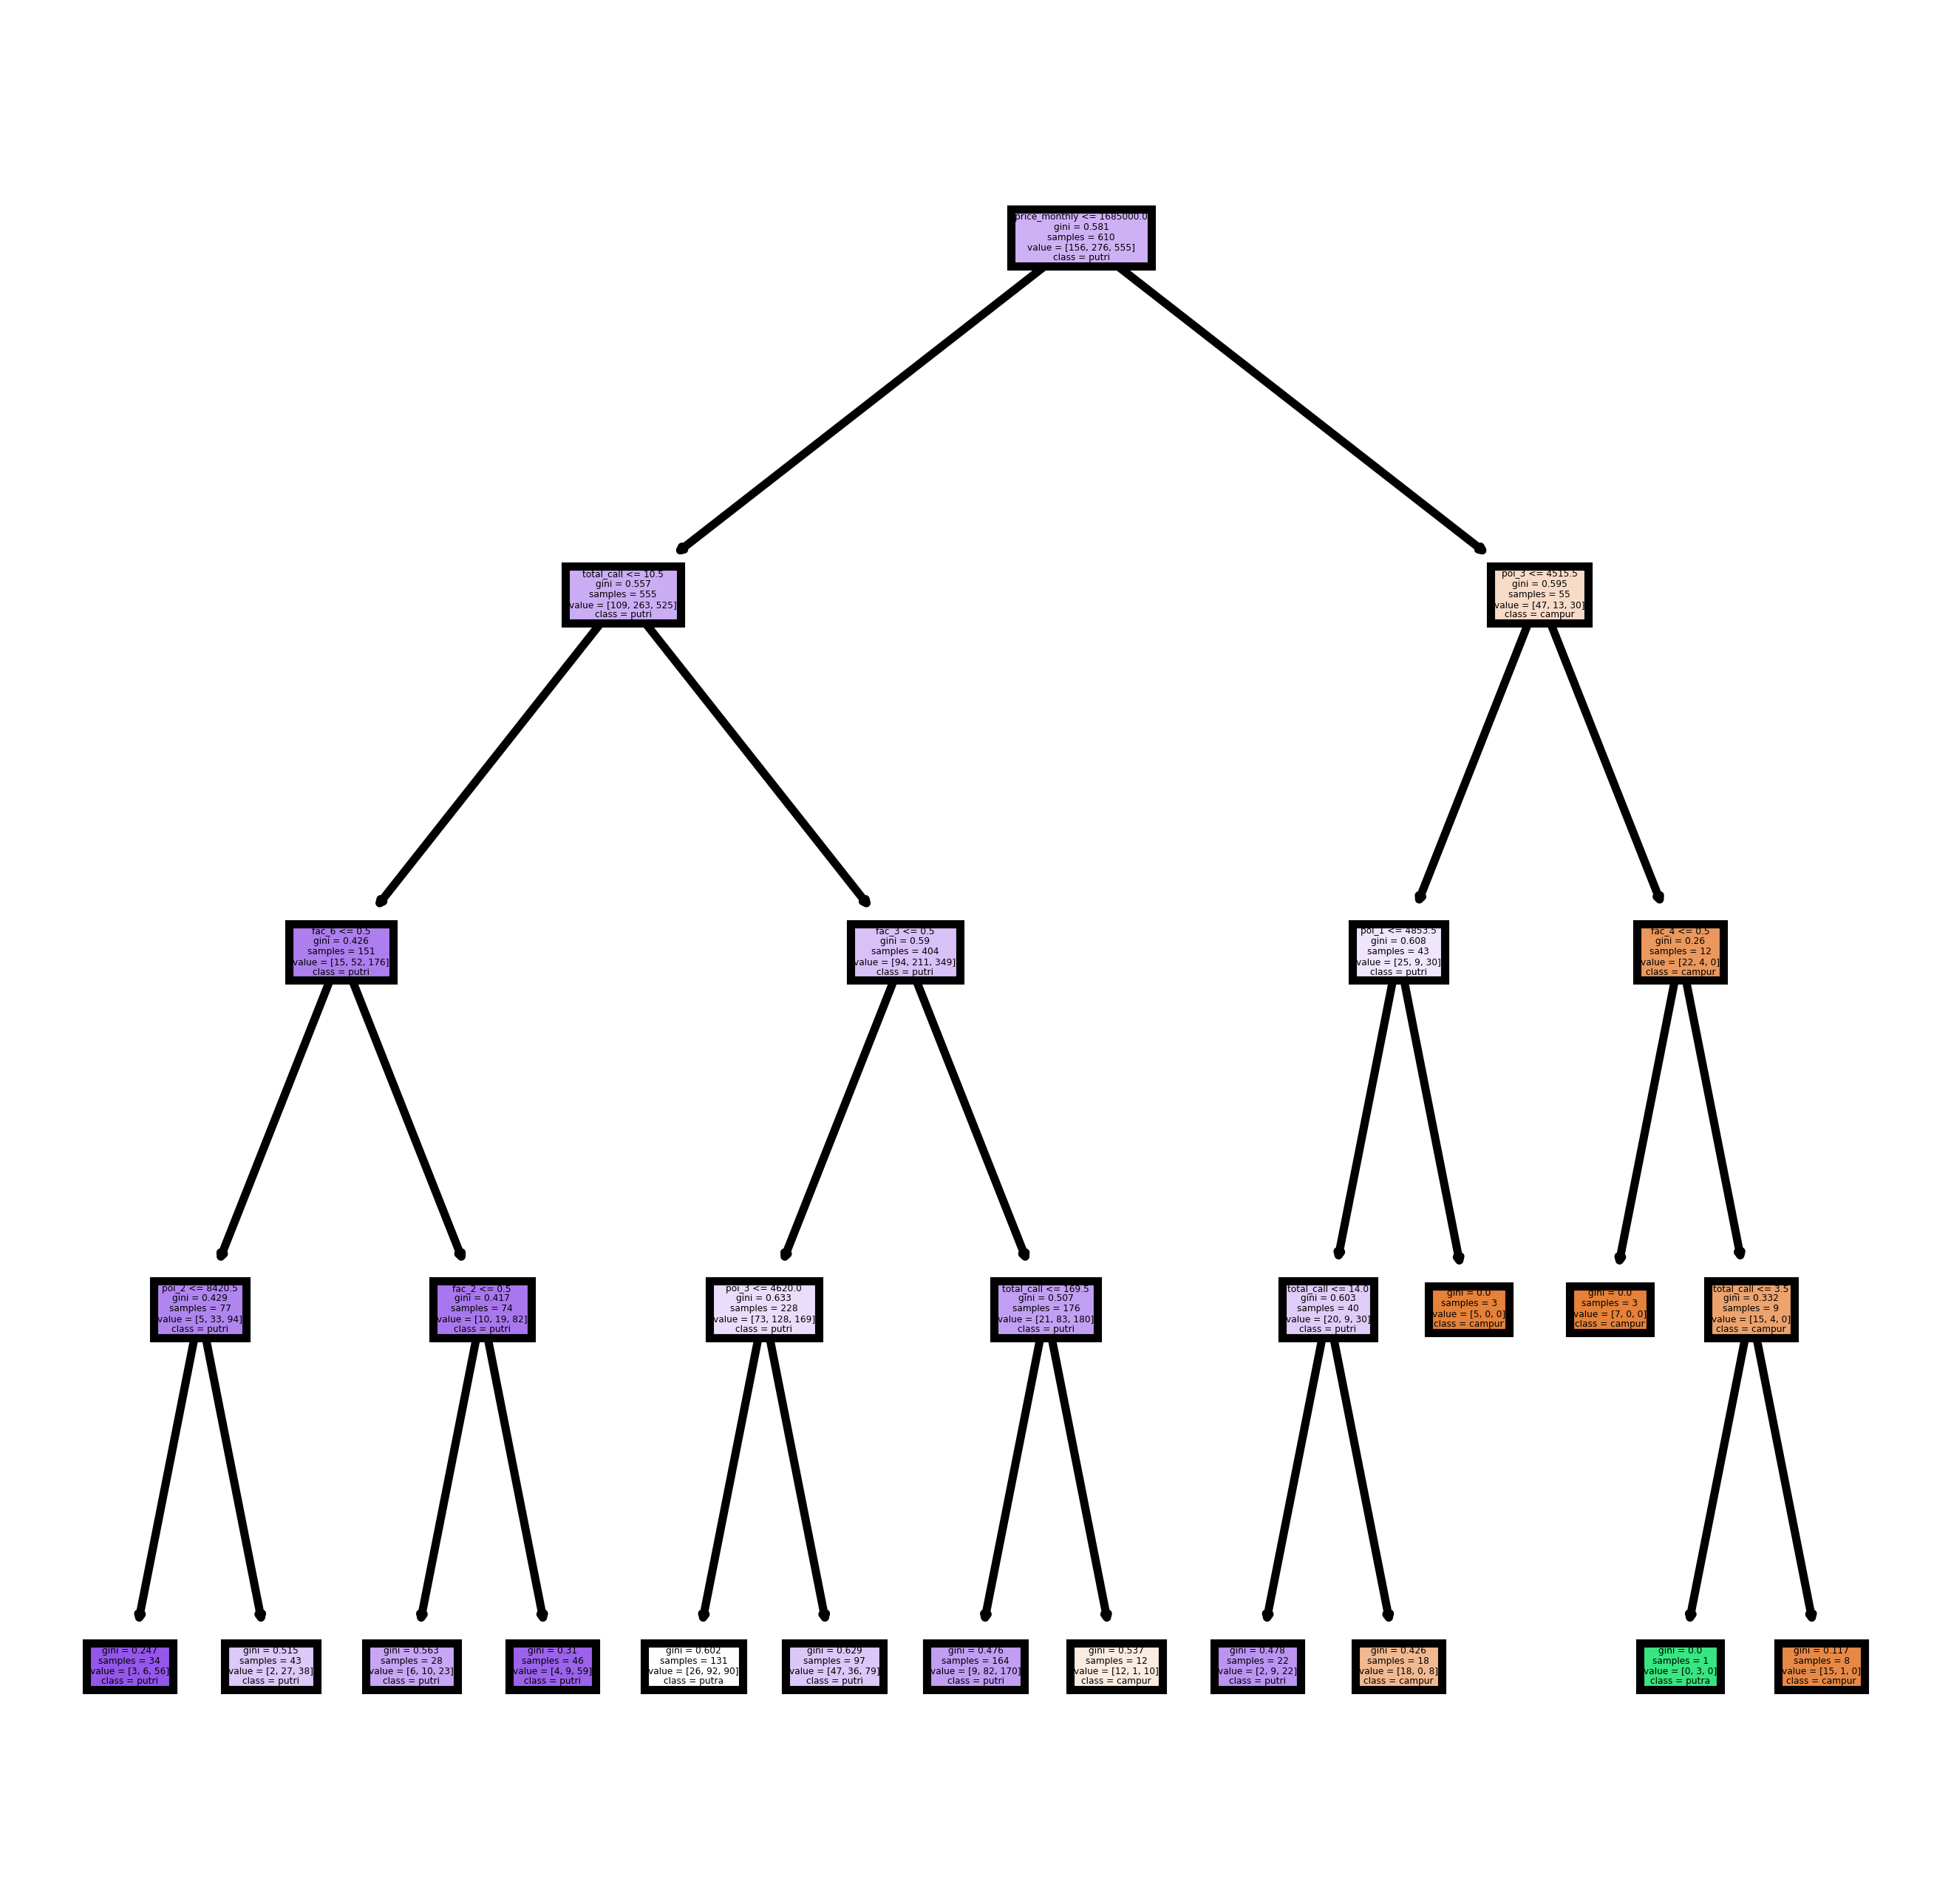

In [110]:
fn=x_train.columns
cn=['campur','putra','putri']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')